In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [9]:
max_x_value = 100
window = 10
df = torch.linspace(0, max_x_value, steps= 2*max_x_value +1)
df = torch.cos(df)

In [10]:
df_temp = []
for i in range(len(df)-window):
    df_temp.append((df[i:i+window],df[i+window:i+window+1]))
df = df_temp
train = df

In [11]:
class LSTM_model(torch.nn.Module):
    def __init__(self, input_size=1, hs1=16, out_size=1):
        super().__init__()
        self.hs1 = hs1
        self.hidden = (torch.zeros(1,1,hs1), torch.zeros(1,1,hs1))
        self.lstm = torch.nn.LSTM(input_size,hs1)
        self.out = torch.nn.Linear(hs1,out_size)

    def forward(self,x):
        lstm_out, self.hidden = self.lstm(x.view(len(x), 1, -1), self.hidden)
        pred = self.out(lstm_out.view(len(x),-1))
        return pred[-1]

In [12]:
torch.manual_seed(12345)
model = LSTM_model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [13]:
preds = []
epochs = 11
for i in range(epochs):
    for x, y in train:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hs1), torch.zeros(1,1,model.hs1))
        y_pred = model(x)
        if i+1 == epochs:
            preds.append(y.item())
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    if i%10 == 0:
        print(f'Epoch: {i:2} Loss: {loss.item():10.8f}')

Epoch:  0 Loss: 0.90105462
Epoch: 10 Loss: 0.71370548


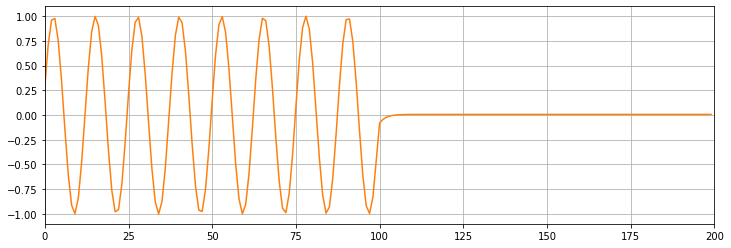

In [14]:
preds = preds[0:max_x_value]
for i in range(max_x_value, max_x_value+100):
    x = torch.FloatTensor(preds[-window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hs1),torch.zeros(1,1,model.hs1))
        preds.append(model(x).item())

plt.figure(figsize=(12,4))
plt.xlim(0,max_x_value+100)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(0, max_x_value+100),preds)
plt.show()